In [17]:
%pip install  openpyxl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.offsetbox import AnchoredText

Note: you may need to restart the kernel to use updated packages.


In [18]:
final_data = pd.read_csv('../data/final_data.csv')

In [19]:
final_data

,Unnamed: 0,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT,State_CTY,Population,Crime_Rates,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,0,Alabama,3,490,7,35,130,318,Alabama3,208563,234.941001,2.9,7.1,28.5,21.2,10.6,17.4,12.3,89.9,29.6
1,1,Alabama,15,303,8,17,65,213,Alabama15,114611,264.372530,6.5,11.3,31.7,27.1,7.0,9.3,7.2,82.2,16.5
2,2,Alabama,43,28,1,4,3,20,Alabama43,82471,33.951328,8.0,14.6,32.2,18.3,10.0,11.4,5.5,77.4,16.9
3,3,Alabama,49,39,2,1,1,35,Alabama49,70900,55.007052,10.3,15.3,31.8,22.1,9.7,6.8,4.1,74.4,10.9
4,4,Alabama,55,185,7,4,35,139,Alabama55,102564,180.375180,6.3,12.2,34.8,23.5,7.7,9.7,5.9,81.5,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,Wisconsin,133,225,24,27,51,123,Wisconsin133,134296,167.540359,1.1,2.8,23.7,19.8,9.7,27.8,15.1,96.1,42.9
768,768,Wisconsin,139,200,1,5,38,156,Wisconsin139,398424,50.197779,2.1,5.7,34.0,19.7,10.1,20.3,8.1,92.2,28.4
769,769,Wisconsin,141,15,1,5,2,7,Wisconsin141,169886,8.829450,2.6,5.6,37.2,20.2,13.1,12.6,8.7,91.8,21.3
770,770,Wyoming,21,99,1,6,9,83,Wyoming21,73107,135.417949,1.7,4.3,25.3,26.5,14.9,17.4,9.9,94.0,27.3


In [86]:
%pip install scikit-learn
from sklearn.linear_model import LinearRegression

Note: you may need to restart the kernel to use updated packages.


In [21]:
model1 = LinearRegression().fit(final_data["Population 25 years and over!!Graduate or professional degree"].astype(int).values.reshape(-1,1),final_data['Crime_Rates'].astype(int).values)

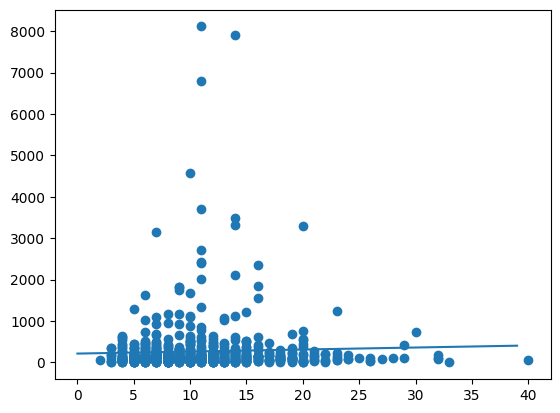

In [22]:
plt.scatter(final_data["Population 25 years and over!!Graduate or professional degree"].astype(int),final_data['Crime_Rates'].astype(int))
plt.plot(range(0,40), model1.predict(np.array(range(0,40)).reshape(-1,1)))

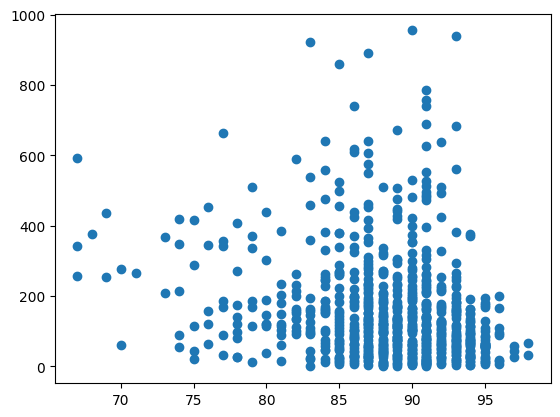

In [23]:
#more crime with higher education... lack of data points with low education maybe?
plt.scatter(final_data["Percent high school graduate or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int))

In [24]:
model = np.poly1d(np.polyfit(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int),1))

In [25]:
reg = LinearRegression().fit(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int).values.reshape(-1, 1), final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int).values)

In [26]:
reg.predict(np.array(20).reshape(-1,1))

array([162.18584534])

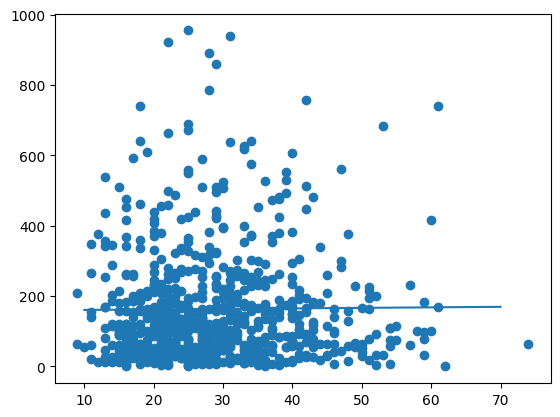

In [27]:
#plotting all crime data points less than 1000 against bachelors degree or higher
plt.scatter(final_data["Percent bachelor's degree or higher"][final_data['Crime_Rates'][final_data['Crime_Rates']<1000].index].astype(int),final_data['Crime_Rates'][final_data['Crime_Rates']<1000].astype(int))
plt.plot(range(10,71), reg.predict(np.array(range(10,71)).reshape(-1,1)))

In [28]:
for i in final_data.iloc[:, 4:8]:
    final_data[i] = (final_data[i].astype(int)/final_data['Population'])*100000

In [29]:
final_data

,Unnamed: 0,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT,State_CTY,Population,Crime_Rates,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,0,Alabama,3,490,3.356300,16.781500,62.331286,152.471915,Alabama3,208563,234.941001,2.9,7.1,28.5,21.2,10.6,17.4,12.3,89.9,29.6
1,1,Alabama,15,303,6.980133,14.832782,56.713579,185.846036,Alabama15,114611,264.372530,6.5,11.3,31.7,27.1,7.0,9.3,7.2,82.2,16.5
2,2,Alabama,43,28,1.212547,4.850190,3.637642,24.250949,Alabama43,82471,33.951328,8.0,14.6,32.2,18.3,10.0,11.4,5.5,77.4,16.9
3,3,Alabama,49,39,2.820874,1.410437,1.410437,49.365303,Alabama49,70900,55.007052,10.3,15.3,31.8,22.1,9.7,6.8,4.1,74.4,10.9
4,4,Alabama,55,185,6.825007,3.900004,34.125034,135.525136,Alabama55,102564,180.375180,6.3,12.2,34.8,23.5,7.7,9.7,5.9,81.5,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,Wisconsin,133,225,17.870972,20.104843,37.975815,91.588729,Wisconsin133,134296,167.540359,1.1,2.8,23.7,19.8,9.7,27.8,15.1,96.1,42.9
768,768,Wisconsin,139,200,0.250989,1.254944,9.537578,39.154268,Wisconsin139,398424,50.197779,2.1,5.7,34.0,19.7,10.1,20.3,8.1,92.2,28.4
769,769,Wisconsin,141,15,0.588630,2.943150,1.177260,4.120410,Wisconsin141,169886,8.829450,2.6,5.6,37.2,20.2,13.1,12.6,8.7,91.8,21.3
770,770,Wyoming,21,99,1.367858,8.207148,12.310723,113.532220,Wyoming21,73107,135.417949,1.7,4.3,25.3,26.5,14.9,17.4,9.9,94.0,27.3


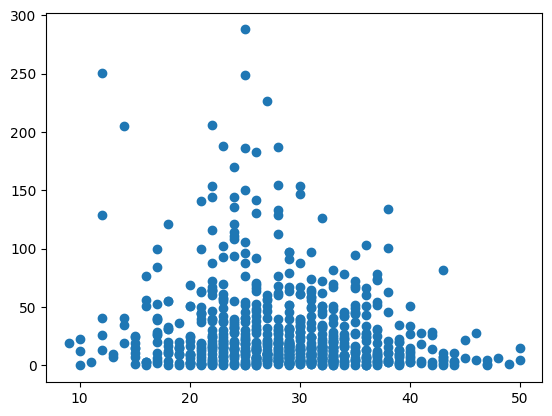

In [30]:
plt.scatter(final_data['Population 25 years and over!!High school graduate (includes equivalency)'][final_data['Crime_Rates'] < 1000].astype(int), final_data['ROBBERY'][final_data['Crime_Rates'] < 1000].astype(int) )

array([[ 1.        , -0.10159703],
       [-0.10159703,  1.        ]])

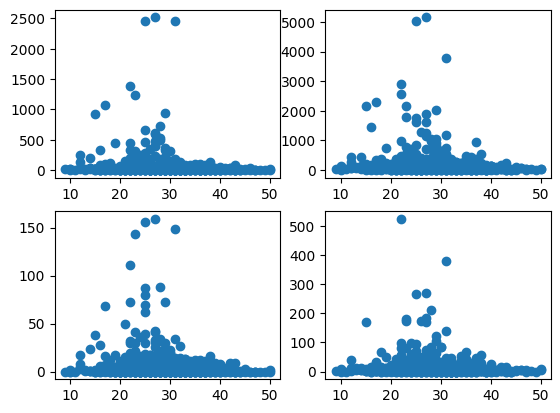

In [31]:
figure, axis = plt.subplots(2,2)

axis[0,0].scatter(final_data['Population 25 years and over!!High school graduate (includes equivalency)'].astype(int), final_data['ROBBERY'].astype(int))
axis[1,0].scatter(final_data['Population 25 years and over!!High school graduate (includes equivalency)'].astype(int), final_data['MURDER'].astype(int))
axis[1,1].scatter(final_data['Population 25 years and over!!High school graduate (includes equivalency)'].astype(int), final_data['RAPE'].astype(int))
axis[0,1].scatter(final_data['Population 25 years and over!!High school graduate (includes equivalency)'].astype(int), final_data['AGASSLT'].astype(int))
r = np.corrcoef(final_data['Population 25 years and over!!High school graduate (includes equivalency)'].astype(int), final_data['MURDER'].astype(int))
r

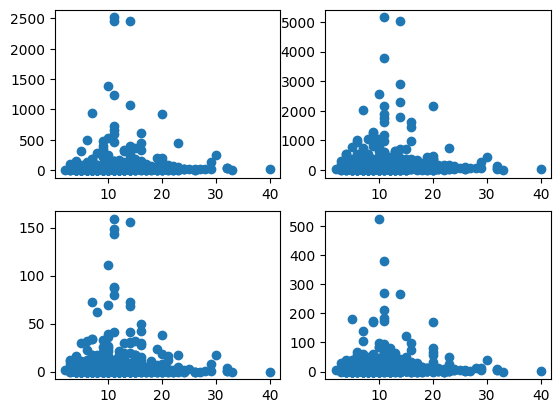

In [32]:
figure, axis = plt.subplots(2,2)
educational_attainment = 'Population 25 years and over!!Graduate or professional degree'
axis[0,0].scatter(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int))
axis[1,0].scatter(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int))
axis[1,1].scatter(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int))
axis[0,1].scatter(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int))

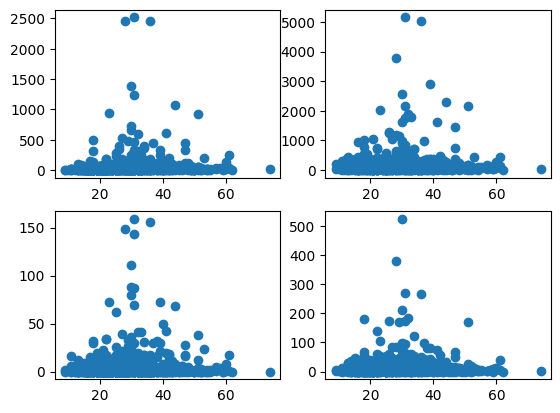

In [33]:
figure, axis = plt.subplots(2,2)
educational_attainment = "Percent bachelor's degree or higher"
axis[0,0].scatter(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int))
axis[1,0].scatter(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int))
axis[1,1].scatter(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int))
axis[0,1].scatter(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int))

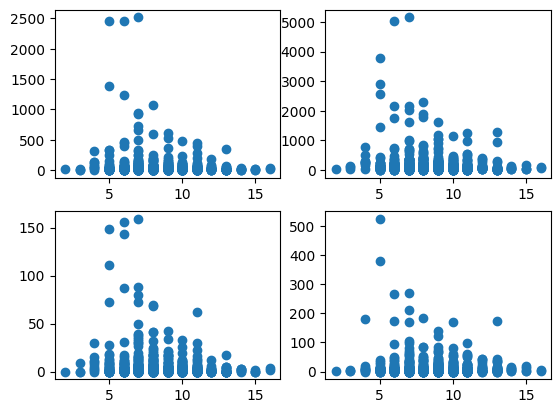

In [34]:
figure, axis = plt.subplots(2,2)
educational_attainment = "Population 25 years and over!!Associate's degree"
axis[0,0].scatter(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int))
axis[1,0].scatter(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int))
axis[1,1].scatter(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int))
axis[0,1].scatter(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int))

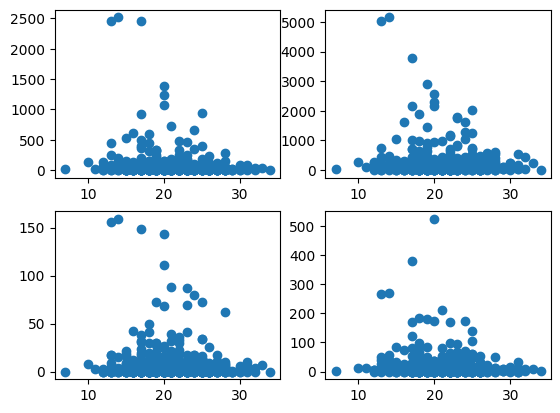

In [35]:
figure, axis = plt.subplots(2,2)
educational_attainment = "Population 25 years and over!!Some college, no degree"
axis[0,0].scatter(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int))
axis[1,0].scatter(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int))
axis[1,1].scatter(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int))
axis[0,1].scatter(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int))

In [36]:
def grapher_func(educational_attainment):
    figure, axis = plt.subplots(2,2)
    axis[0,0].scatter(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int))
    axis[1,0].scatter(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int))
    axis[1,1].scatter(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int))
    axis[0,1].scatter(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int))
    print(np.corrcoef(final_data[educational_attainment].astype(int), final_data['ROBBERY'].astype(int)))
    print(np.corrcoef(final_data[educational_attainment].astype(int), final_data['MURDER'].astype(int)))
    print(np.corrcoef(final_data[educational_attainment].astype(int), final_data['RAPE'].astype(int)))
    print(np.corrcoef(final_data[educational_attainment].astype(int), final_data['AGASSLT'].astype(int)))

[[ 1.         -0.12899363]
 [-0.12899363  1.        ]]
[[ 1.         -0.06431792]
 [-0.06431792  1.        ]]
[[ 1.         -0.08794832]
 [-0.08794832  1.        ]]
[[ 1.       -0.076824]
 [-0.076824  1.      ]]


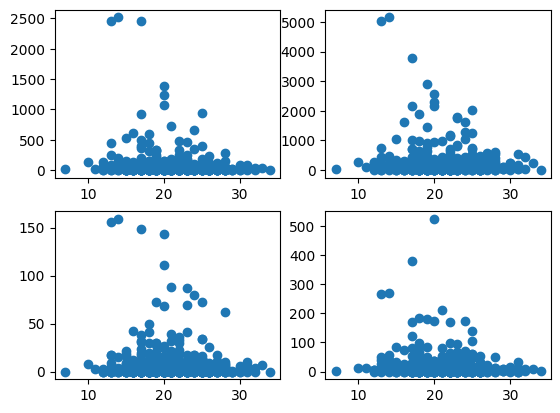

In [37]:
grapher_func("Population 25 years and over!!Some college, no degree")

[[ 1.         -0.13645169]
 [-0.13645169  1.        ]]
[[ 1.         -0.16365025]
 [-0.16365025  1.        ]]
[[ 1.         -0.07791958]
 [-0.07791958  1.        ]]
[[ 1.         -0.13240698]
 [-0.13240698  1.        ]]


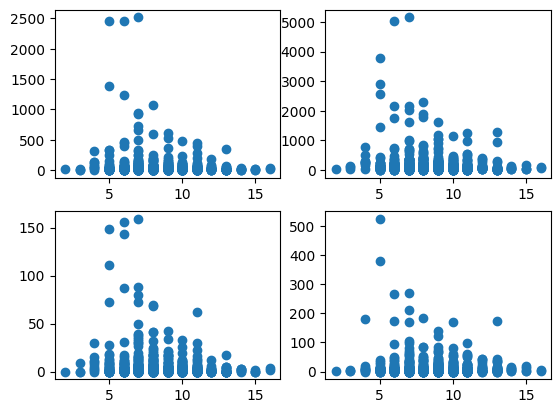

In [38]:
grapher_func("Population 25 years and over!!Associate's degree")

In [39]:
final_data

,Unnamed: 0,FIPS_ST,FIPS_CTY,GRNDTOT,MURDER,RAPE,ROBBERY,AGASSLT,State_CTY,Population,Crime_Rates,Population 25 years and over!!Less than 9th grade,"Population 25 years and over!!9th to 12th grade, no diploma",Population 25 years and over!!High school graduate (includes equivalency),"Population 25 years and over!!Some college, no degree",Population 25 years and over!!Associate's degree,Population 25 years and over!!Bachelor's degree,Population 25 years and over!!Graduate or professional degree,Percent high school graduate or higher,Percent bachelor's degree or higher
0,0,Alabama,3,490,3.356300,16.781500,62.331286,152.471915,Alabama3,208563,234.941001,2.9,7.1,28.5,21.2,10.6,17.4,12.3,89.9,29.6
1,1,Alabama,15,303,6.980133,14.832782,56.713579,185.846036,Alabama15,114611,264.372530,6.5,11.3,31.7,27.1,7.0,9.3,7.2,82.2,16.5
2,2,Alabama,43,28,1.212547,4.850190,3.637642,24.250949,Alabama43,82471,33.951328,8.0,14.6,32.2,18.3,10.0,11.4,5.5,77.4,16.9
3,3,Alabama,49,39,2.820874,1.410437,1.410437,49.365303,Alabama49,70900,55.007052,10.3,15.3,31.8,22.1,9.7,6.8,4.1,74.4,10.9
4,4,Alabama,55,185,6.825007,3.900004,34.125034,135.525136,Alabama55,102564,180.375180,6.3,12.2,34.8,23.5,7.7,9.7,5.9,81.5,15.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,Wisconsin,133,225,17.870972,20.104843,37.975815,91.588729,Wisconsin133,134296,167.540359,1.1,2.8,23.7,19.8,9.7,27.8,15.1,96.1,42.9
768,768,Wisconsin,139,200,0.250989,1.254944,9.537578,39.154268,Wisconsin139,398424,50.197779,2.1,5.7,34.0,19.7,10.1,20.3,8.1,92.2,28.4
769,769,Wisconsin,141,15,0.588630,2.943150,1.177260,4.120410,Wisconsin141,169886,8.829450,2.6,5.6,37.2,20.2,13.1,12.6,8.7,91.8,21.3
770,770,Wyoming,21,99,1.367858,8.207148,12.310723,113.532220,Wyoming21,73107,135.417949,1.7,4.3,25.3,26.5,14.9,17.4,9.9,94.0,27.3


In [40]:
#lets remove everything with less than 10 counties
final_data['FIPS_ST'].value_counts()

FIPS_ST
Texas             53
Florida           41
California        40
Pennsylvania      40
North Carolina    39
New York          38
Ohio              38
Georgia           36
Michigan          29
Virginia          25
Wisconsin         23
Indiana           22
New Jersey        21
South Carolina    21
Tennessee         20
Alabama           19
Washington        19
Missouri          17
Louisiana         17
Maryland          15
Minnesota         14
Oregon            14
Kentucky          13
Massachusetts     12
Colorado          12
Oklahoma          11
Arkansas          11
Iowa              10
Arizona           10
New Mexico        10
Mississippi        8
Connecticut        8
West Virginia      7
New Hampshire      6
Montana            6
Maine              6
Idaho              6
Utah               6
North Dakota       4
Rhode Island       4
Kansas             4
Hawaii             4
Nebraska           3
Delaware           3
South Dakota       2
Nevada             2
Wyoming            2
Vermo

In [41]:
under_10_counties = ['Mississippi',
       'Connecticut', 'West Virginia', 'New Hampshire', 'Montana', 'Maine',
       'Idaho', 'Utah', 'North Dakota', 'Rhode Island', 'Kansas', 'Hawaii',
       'Nebraska', 'Delaware', 'South Dakota', 'Nevada', 'Wyoming', 'Vermont']
for i in under_10_counties:
    final_data = final_data[final_data['FIPS_ST'] != i]

In [42]:
final_data = final_data.reset_index(drop=True)

In [43]:
not_included = pd.DataFrame(['Alaska', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Illinois', 'Kansas', 
'Maine', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
'North Dakota', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 
'West Virginia', 'Wyoming'], columns = ['Not Included States'])
new_col_list = list()
for i in not_included.index:
    new_col_list.append(1)
not_included['Number'] = new_col_list

In [44]:
not_included

,Not Included States,Number
0,Alaska,1
1,Connecticut,1
2,Delaware,1
3,Hawaii,1
4,Idaho,1
5,Illinois,1
6,Kansas,1
7,Maine,1
8,Mississippi,1
9,Montana,1


In [45]:
type = 'Crime_Rates'
for i in final_data['FIPS_ST'].value_counts().index:
     print(np.corrcoef(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == i].index].astype(int), final_data[type][final_data['FIPS_ST'] == i].astype(int))[0,1])

0.1707828355777252
0.02438954719374862
-0.6929576248227219
0.17312827367005837
0.15592264185124713
0.1954625545109791
0.02284732625113936
-0.13491748735185438
-0.10168780479752454
0.2194497672263659
0.06378531479963942
-0.15100239130409687
0.05168710711070319
0.1822033590781965
0.30880477499555714
0.620332347509781
-0.01418775473111488
0.2186915945849404
0.3200928348032409
-0.37316839880682096
0.34767130766863
0.10989662272332909
0.10106871191788852
-0.2713345710987822
-0.20670934591193918
0.23238279273475662
-0.2850312337214824
0.37402405351966234
0.42697930768918657
-0.4549274924948681


In [46]:
x= final_data['Population 25 years and over!!Graduate or professional degree'][final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].index].astype(int)
p = np.polyfit(final_data['Population 25 years and over!!Graduate or professional degree'][final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].index].astype(int), np.log(final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].astype(int)), 1)
a = np.exp(p[1])
b = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.exp(b * x_fitted)

array([[ 1.        , -0.69295762],
       [-0.69295762,  1.        ]])

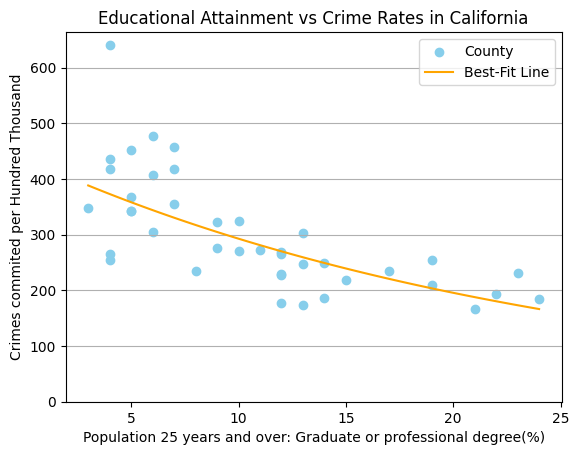

In [47]:
plt.scatter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].astype(int), color='skyblue')
plt.xlabel('Population 25 years and over: Graduate or professional degree(%)')
plt.ylabel('Crimes commited per Hundred Thousand')
plt.title('Educational Attainment vs Crime Rates in California')
plt.grid(axis='y')
plt.ylim(ymin=0)
plt.plot(x_fitted, y_fitted, label='Fitted curve', color='orange')
legend_drawn_flag = True
plt.legend(["County", "Best-Fit Line"], loc=0, frameon=legend_drawn_flag)
np.corrcoef(final_data['Population 25 years and over!!Graduate or professional degree'][final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data['Crime_Rates'][final_data['FIPS_ST'] == 'California'].astype(int))

In [48]:
def exp_plotter(x,y):
    p = np.polyfit(x, np.log(y), 1)
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    y_fitted = a * np.exp(b * x_fitted)
    plt.plot(x_fitted, y_fitted, label='Fitted curve', color='orange')

Text(0, 0.5, 'Murders per 100,000 people')

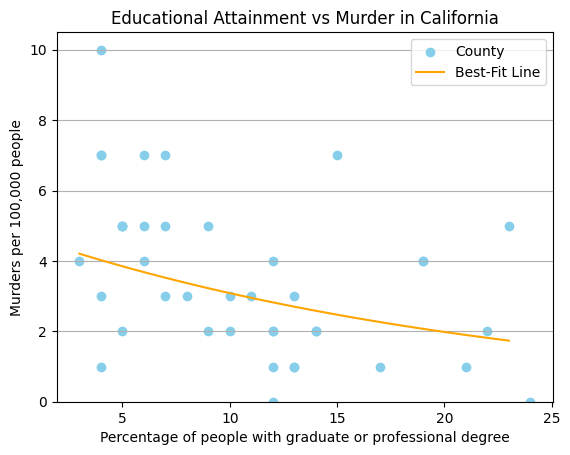

In [49]:
type = 'MURDER'
plt.scatter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int), color='skyblue')
plt.grid(axis='y')
plt.ylim(ymin=0)
exp_plotter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][(final_data['FIPS_ST'] == 'California') & (final_data[type] > 1)].index].astype(int), final_data[type][(final_data['FIPS_ST'] == 'California') & (final_data[type] > 1)].astype(int))
legend_drawn_flag = True
plt.legend(["County", "Best-Fit Line"], loc=0, frameon=legend_drawn_flag)
plt.title('Educational Attainment vs Murder in California')
plt.xlabel('Percentage of people with graduate or professional degree')
plt.ylabel('Murders per 100,000 people')

Text(0, 0.5, 'Rapes per 100,000 people')

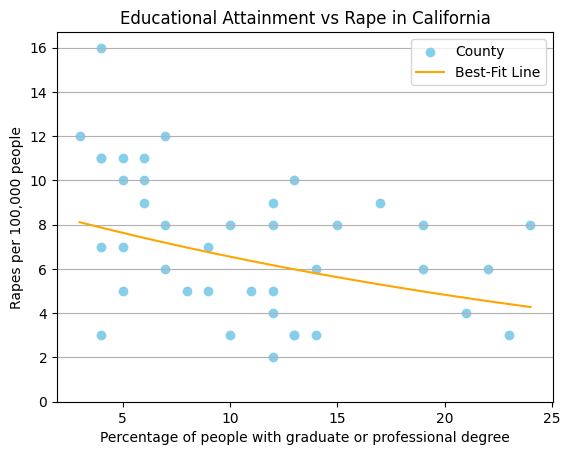

In [50]:
type = 'RAPE'
plt.scatter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int), color='skyblue')
plt.grid(axis='y')
plt.ylim(ymin=0)
exp_plotter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int))
legend_drawn_flag = True
plt.legend(["County", "Best-Fit Line"], loc=0, frameon=legend_drawn_flag)
plt.title('Educational Attainment vs Rape in California')
plt.xlabel('Percentage of people with graduate or professional degree')
plt.ylabel('Rapes per 100,000 people')

Text(0, 0.5, 'Aggravated Assaults per 100,000 people')

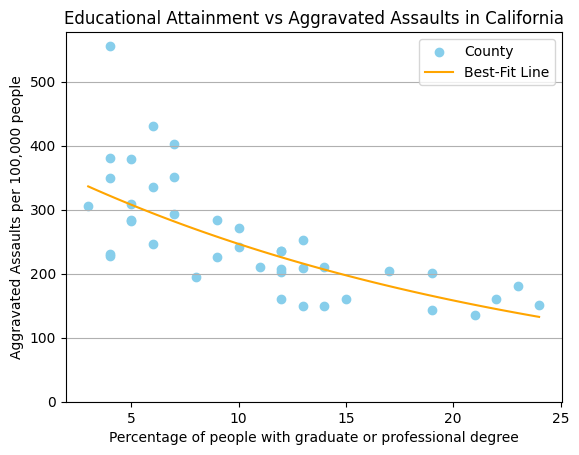

In [51]:
type = 'AGASSLT'
plt.scatter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int), color='skyblue')
exp_plotter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int))
np.corrcoef(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int),  final_data[type][final_data['FIPS_ST'] == 'California'].astype(int))
plt.grid(axis='y')
plt.ylim(ymin=0)
legend_drawn_flag = True
plt.legend(["County", "Best-Fit Line"], loc=0, frameon=legend_drawn_flag)
plt.title('Educational Attainment vs Aggravated Assaults in California')
plt.xlabel('Percentage of people with graduate or professional degree')
plt.ylabel('Aggravated Assaults per 100,000 people')

Text(0, 0.5, 'Robberies per 100,000 people')

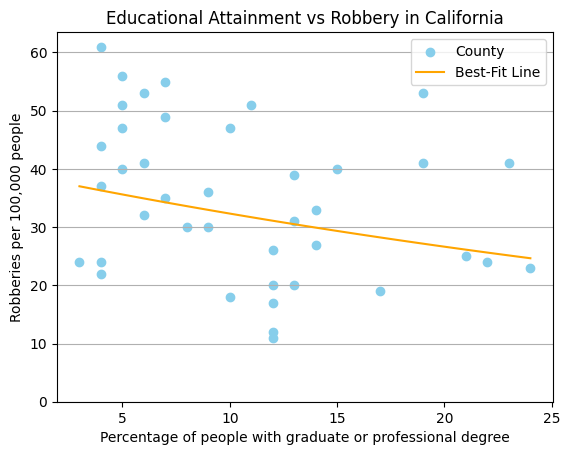

In [52]:
type = 'ROBBERY'
plt.scatter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int), color='skyblue')
exp_plotter(final_data['Population 25 years and over!!Graduate or professional degree'][final_data[type][final_data['FIPS_ST'] == 'California'].index].astype(int), final_data[type][final_data['FIPS_ST'] == 'California'].astype(int))
plt.grid(axis='y')
plt.ylim(ymin=0)
plt.legend(["County", "Best-Fit Line"], loc=0, frameon=legend_drawn_flag)
plt.title('Educational Attainment vs Robbery in California')
plt.xlabel('Percentage of people with graduate or professional degree')
plt.ylabel('Robberies per 100,000 people')

In [53]:
zero_data = np.zeros(shape=(30,5))
correlation_df = pd.DataFrame(zero_data,columns= ['MURDER', 'RAPE', 'ROBBERY', 'AGASSLT','Crime_Rates'])

In [54]:
correlation_df = correlation_df.set_index(final_data['FIPS_ST'].value_counts().index)

In [55]:
correlation_df

,MURDER,RAPE,ROBBERY,AGASSLT,Crime_Rates
FIPS_ST,,,,,
Texas,0.0,0.0,0.0,0.0,0.0
Florida,0.0,0.0,0.0,0.0,0.0
California,0.0,0.0,0.0,0.0,0.0
Pennsylvania,0.0,0.0,0.0,0.0,0.0
North Carolina,0.0,0.0,0.0,0.0,0.0
Ohio,0.0,0.0,0.0,0.0,0.0
New York,0.0,0.0,0.0,0.0,0.0
Georgia,0.0,0.0,0.0,0.0,0.0
Michigan,0.0,0.0,0.0,0.0,0.0


In [56]:
correlation_df.index

Index(['Texas', 'Florida', 'California', 'Pennsylvania', 'North Carolina',
       'Ohio', 'New York', 'Georgia', 'Michigan', 'Virginia', 'Wisconsin',
       'Indiana', 'New Jersey', 'South Carolina', 'Tennessee', 'Washington',
       'Alabama', 'Louisiana', 'Missouri', 'Maryland', 'Minnesota', 'Oregon',
       'Kentucky', 'Massachusetts', 'Colorado', 'Oklahoma', 'Arkansas',
       'New Mexico', 'Arizona', 'Iowa'],
      dtype='object', name='FIPS_ST')

In [57]:
def correlation_calc(type, attainment):
    for i in correlation_df.index:
         correlation_df.loc[i,type] = np.corrcoef(final_data[attainment][final_data[type][final_data['FIPS_ST'] == i].index].astype(int), final_data[type][final_data['FIPS_ST'] == i].astype(int))[0,1]


In [58]:
for i in correlation_df.columns:
    correlation_calc(i, "Percent high school graduate or higher")

In [59]:
correlation_df

,MURDER,RAPE,ROBBERY,AGASSLT,Crime_Rates
FIPS_ST,,,,,
Texas,-0.226844,-0.304632,-0.237655,-0.230989,-0.244645
Florida,-0.218200,-0.042044,-0.218922,-0.181166,-0.183576
California,-0.283968,-0.348421,-0.374519,-0.417247,-0.438176
Pennsylvania,-0.283949,-0.316349,-0.304036,-0.238552,-0.268398
North Carolina,0.257169,0.254022,0.240294,0.198282,0.216777
Ohio,0.079087,0.144086,0.106424,0.103012,0.115236
New York,-0.538824,-0.469455,-0.538149,-0.534488,-0.534268
Georgia,0.065335,-0.145740,0.011167,-0.260600,-0.238806
Michigan,-0.344537,-0.012386,-0.329035,-0.576596,-0.559568


In [60]:
correlation_df[correlation_df['Crime_Rates']<-.5]

,MURDER,RAPE,ROBBERY,AGASSLT,Crime_Rates
FIPS_ST,,,,,
New York,-0.538824,-0.469455,-0.538149,-0.534488,-0.534268
Michigan,-0.344537,-0.012386,-0.329035,-0.576596,-0.559568
Colorado,-0.480278,-0.399588,-0.568486,-0.509524,-0.532694


In [61]:
for i in correlation_df.columns:
    correlation_calc(i, "Population 25 years and over!!Graduate or professional degree")

Text(0, 0.5, 'Correlation')

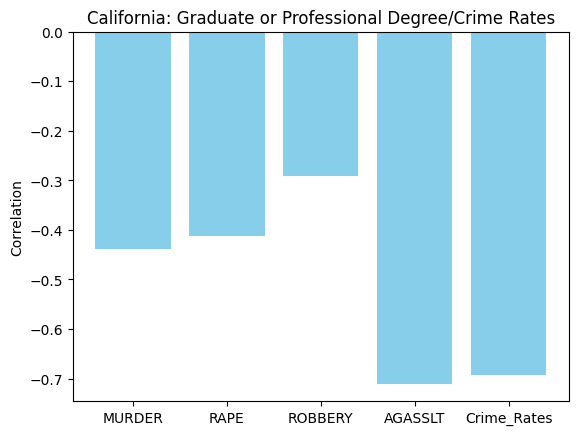

In [62]:
plt.bar(correlation_df.columns,correlation_df.iloc[2], color='skyblue')
plt.title('California: Graduate or Professional Degree/Crime Rates')
plt.ylabel('Correlation')

In [63]:
cali_corr_list = []
state = 'California'
for i in final_data.iloc[:,11:20].columns:
    cali_corr_list.append(np.corrcoef(final_data[i][final_data['Crime_Rates'][final_data['FIPS_ST'] == state].index].astype(int), final_data['Crime_Rates'][final_data['FIPS_ST'] == state].astype(int))[0,1])
cali_corr_list

[0.27225266992733366,
 0.5918099808729271,
 0.6289355118267992,
 0.49155803007001775,
 0.2685357712435992,
 -0.6689772249757725,
 -0.6929576248227219,
 -0.4381759082371874,
 -0.6864746687956225]

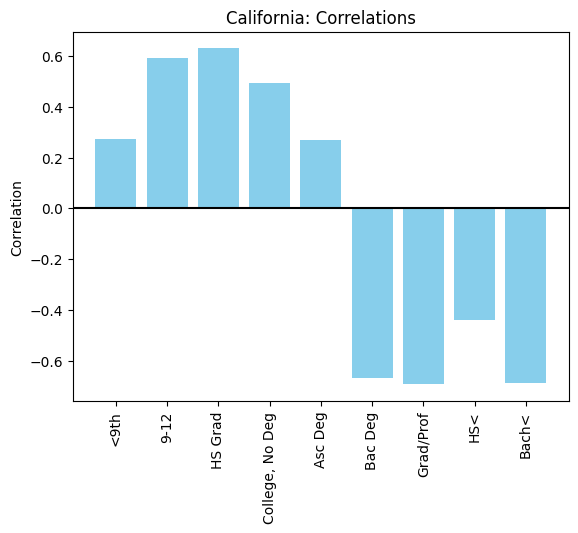

In [64]:
plt.bar(['<9th','9-12', 'HS Grad', 'College, No Deg', 'Asc Deg','Bac Deg', 'Grad/Prof','HS<','Bach<'],cali_corr_list, color='skyblue')
plt.title('California: Correlations')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black')

In [65]:
for i in correlation_df.columns:
    correlation_calc(i, "Percent high school graduate or higher")

Text(0, 0.5, 'Correlation')

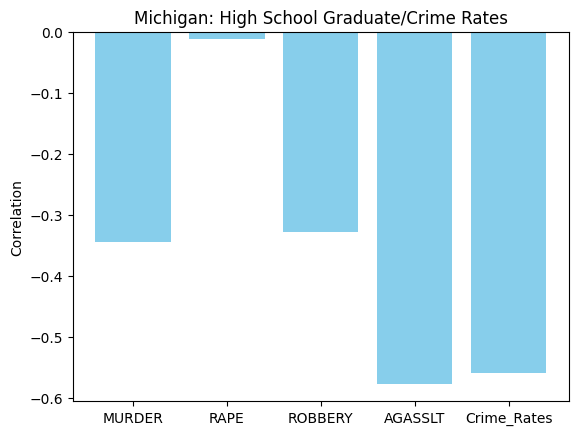

In [66]:
plt.bar(correlation_df.columns,correlation_df.iloc[8], color='skyblue')
plt.title('Michigan: High School Graduate/Crime Rates')
plt.ylabel('Correlation')

In [67]:
mich_corr_list = []
state = 'Michigan'
for i in final_data.iloc[:,11:20].columns:
    mich_corr_list.append(np.corrcoef(final_data[i][final_data['Crime_Rates'][final_data['FIPS_ST'] == state].index].astype(int), final_data['Crime_Rates'][final_data['FIPS_ST'] == state].astype(int))[0,1])
mich_corr_list

[0.44573360859969174,
 0.41841482616239056,
 0.11495137520967733,
 0.06022017611102583,
 -0.04813958429350895,
 -0.3132200222726429,
 -0.10168780479752454,
 -0.5595682795680375,
 -0.20214194848240688]

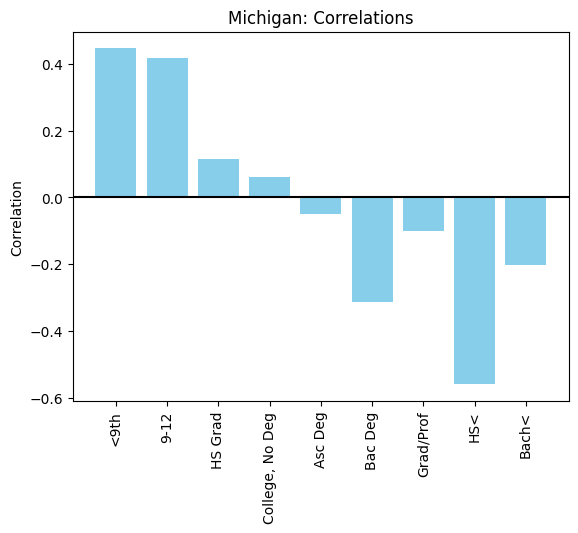

In [68]:
plt.bar(['<9th','9-12', 'HS Grad', 'College, No Deg', 'Asc Deg','Bac Deg', 'Grad/Prof','HS<','Bach<'],mich_corr_list, color='skyblue')
plt.title('Michigan: Correlations')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black')

In [69]:
for i in correlation_df.columns:
    correlation_calc(i, "Percent high school graduate or higher")

Population 25 years and over!!Less than 9th grade: 3
Population 25 years and over!!9th to 12th grade, no diploma: 2
Population 25 years and over!!High school graduate (includes equivalency): 5
Population 25 years and over!!Some college, no degree: 3
Population 25 years and over!!Associate's degree: 11
Population 25 years and over!!Bachelor's degree: 5
Population 25 years and over!!Graduate or professional degree: 3
Percent high school graduate or higher: 12
Percent bachelor's degree or higher: 3


Text(0.5, 0, 'Type of Educational Attainment')

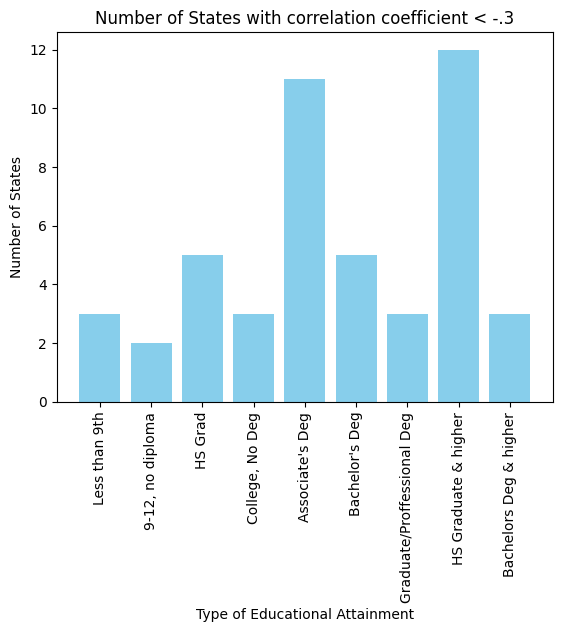

In [70]:
#number of states with a negative correlation
states_neg_list = []
correlation_cutoff = -.3
for z in final_data.iloc[:,11:20].columns:
    for i in correlation_df.columns:
        correlation_calc(i, z)
    print(z+': '+str(len(correlation_df[correlation_df['Crime_Rates']<correlation_cutoff].index)))
    states_neg_list.append(len(correlation_df[correlation_df['Crime_Rates']<correlation_cutoff].index))
plt.bar(['Less than 9th','9-12, no diploma', 'HS Grad', 'College, No Deg', "Associate's Deg","Bachelor's Deg", 'Graduate/Proffessional Deg','HS Graduate & higher','Bachelors Deg & higher'], states_neg_list, color='skyblue')
plt.xticks(rotation=90)
plt.title('Number of States with correlation coefficient < -.3')
plt.ylabel('Number of States')
plt.xlabel('Type of Educational Attainment')

In [71]:
correlation_df.describe()

,MURDER,RAPE,ROBBERY,AGASSLT,Crime_Rates
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.065850,0.080347,0.156753,0.015047,0.045386
std,0.269421,0.271736,0.244360,0.291721,0.292760
min,-0.538835,-0.456529,-0.328851,-0.700564,-0.686475
25%,-0.065979,-0.023596,0.023513,-0.193335,-0.173772
50%,0.090153,0.094911,0.143505,0.039093,0.094582
75%,0.276944,0.284227,0.315557,0.247731,0.247873
max,0.593935,0.604086,0.648734,0.615981,0.626324


In [72]:
correlation_percentages_df = pd.DataFrame(np.zeros([2,9]), columns=['Less than 9th','9-12, no diploma', 'HS Grad', 'College, No Deg', "Associate's Deg","Bachelor's Deg", 'Graduate/Proffessional Deg','HS Graduate & higher','Bachelors Deg & higher'], index=['Percent With Negative Correlation','Percent with Medium Negative Correlation (<-.3)'])
correlation_percentages_df

,Less than 9th,"9-12, no diploma",HS Grad,"College, No Deg",Associate's Deg,Bachelor's Deg,Graduate/Proffessional Deg,HS Graduate & higher,Bachelors Deg & higher
Percent With Negative Correlation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent with Medium Negative Correlation (<-.3),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
states_neg_list = []
correlation_cutoff = 0
for z in final_data.iloc[:,11:20].columns:
    for i in correlation_df.columns:
        correlation_calc(i, z)
    states_neg_list.append(round((len(correlation_df[correlation_df['Crime_Rates']<correlation_cutoff].index)/30)*100))

In [74]:
correlation_percentages_df.iloc[0] = states_neg_list

In [75]:
states_neg_list = []
correlation_cutoff = -.3
for z in final_data.iloc[:,11:20].columns:
    for i in correlation_df.columns:
        correlation_calc(i, z)
    states_neg_list.append(round((len(correlation_df[correlation_df['Crime_Rates']<correlation_cutoff].index)/30)*100))

In [76]:
correlation_percentages_df.iloc[1] = states_neg_list

In [77]:
correlation_percentages_df.iloc[:,[2,4,5,6,7,8]]

,HS Grad,Associate's Deg,Bachelor's Deg,Graduate/Proffessional Deg,HS Graduate & higher,Bachelors Deg & higher
Percent With Negative Correlation,70.0,63.0,50.0,33.0,73.0,37.0
Percent with Medium Negative Correlation (<-.3),17.0,37.0,17.0,10.0,40.0,10.0


Text(0, 0.5, 'Percentage of States (%)')

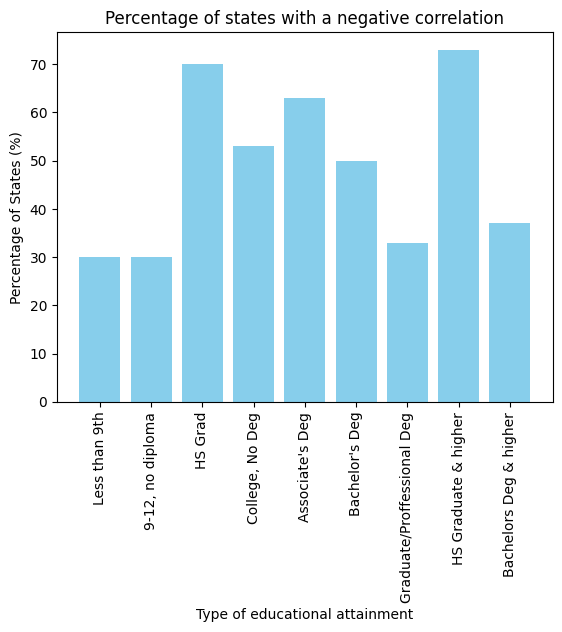

In [78]:
plt.bar(correlation_percentages_df.columns, correlation_percentages_df.iloc[0], color='skyblue')
plt.xticks(rotation=90)
plt.title('Percentage of states with a negative correlation')
plt.xlabel('Type of educational attainment')
plt.ylabel('Percentage of States (%)')

Text(0, 0.5, 'Percentage of States (%)')

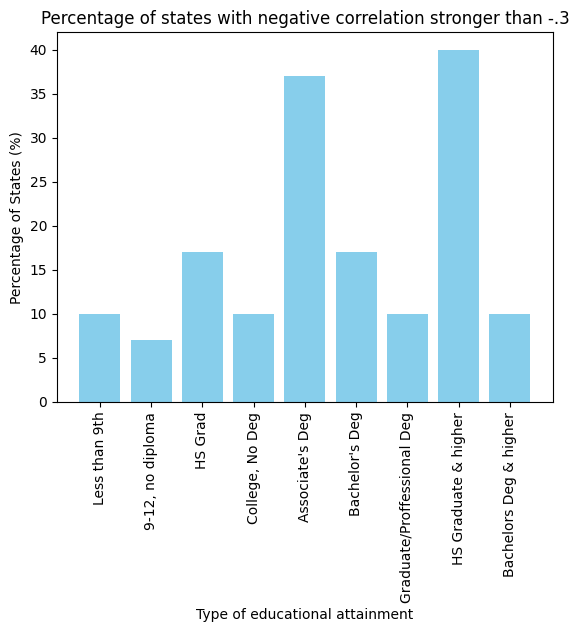

In [79]:
plt.bar(correlation_percentages_df.columns, correlation_percentages_df.iloc[1], color='skyblue')
plt.xticks(rotation=90)
plt.title('Percentage of states with negative correlation stronger than -.3')
plt.xlabel('Type of educational attainment')
plt.ylabel('Percentage of States (%)')

In [80]:
for i in correlation_df.columns:
    correlation_calc(i, "Percent high school graduate or higher")

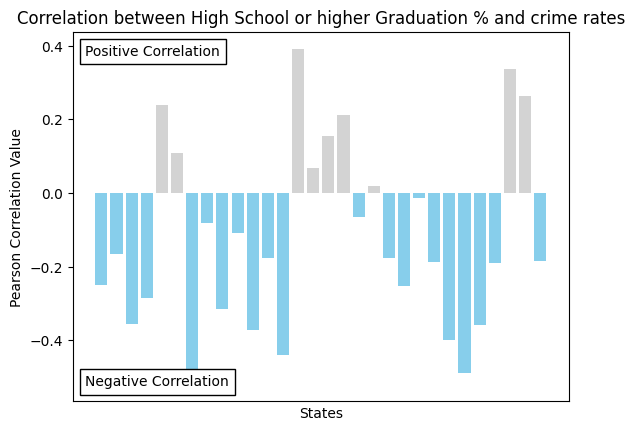

In [92]:
col = []
for val in (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4:
    if val < 0:
        col.append('skyblue')
    else:
        col.append('lightgrey')
figure, ax = plt.subplots(1,1)
ax.bar(range(0,len(correlation_df.index)), (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4, color=col) 
ax.set_xticks([])
ax.set_xlabel('States')
ax.set_ylabel('Pearson Correlation Value')
ax.set_title('Correlation between High School or higher Graduation % and crime rates')
anchored_text = AnchoredText("Positive Correlation", loc=2)
anchored_text1 = AnchoredText("Negative Correlation", frameon=True, loc=3)
ax.add_artist(anchored_text)
ax.add_artist(anchored_text1)

In [94]:
for i in correlation_df.columns:
    correlation_calc(i, "Population 25 years and over!!Bachelor's degree")

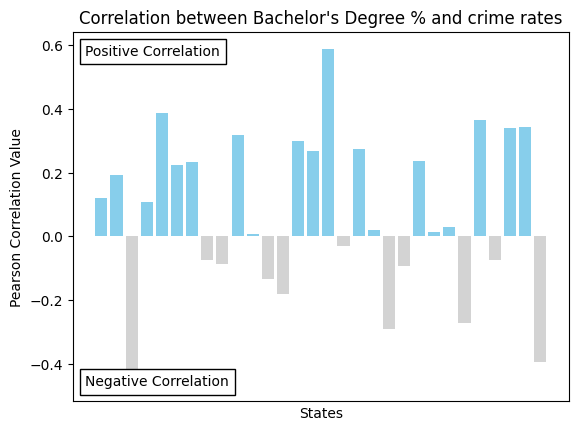

In [96]:
col = []
for val in (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4:
    if val < 0:
        col.append('lightgrey')
    else:
        col.append('skyblue')
figure, ax = plt.subplots(1,1)
ax.bar(range(0,len(correlation_df.index)), (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4, color=col) 
ax.set_xticks([])
ax.set_xlabel("States")
ax.set_ylabel('Pearson Correlation Value')
ax.set_title("Correlation between Bachelor's Degree % and crime rates")
anchored_text = AnchoredText("Positive Correlation", loc=2)
anchored_text1 = AnchoredText("Negative Correlation", frameon=True, loc=3)
ax.add_artist(anchored_text)
ax.add_artist(anchored_text1)

In [97]:
for i in correlation_df.columns:
    correlation_calc(i, "Population 25 years and over!!Associate's degree")

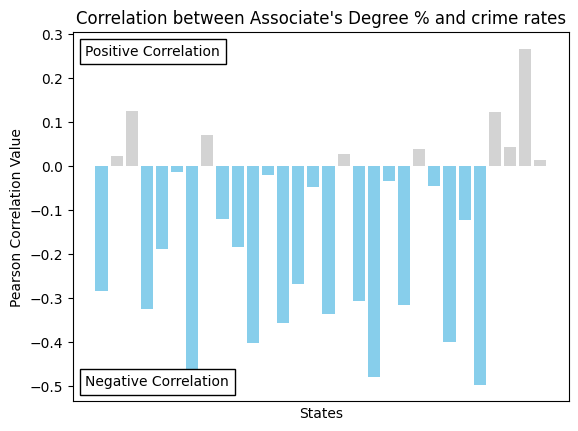

In [98]:
col = []
for val in (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4:
    if val < 0:
        col.append('skyblue')
    else:
        col.append('lightgrey')
figure, ax = plt.subplots(1,1)
ax.bar(range(0,len(correlation_df.index)), (correlation_df['MURDER']+correlation_df['AGASSLT']+correlation_df['RAPE']+correlation_df['ROBBERY'])/4, color=col) 
ax.set_xticks([])
ax.set_xlabel("States")
ax.set_ylabel('Pearson Correlation Value')
ax.set_title("Correlation between Associate's Degree % and crime rates")
anchored_text = AnchoredText("Positive Correlation", loc=2)
anchored_text1 = AnchoredText("Negative Correlation", frameon=True, loc=3)
ax.add_artist(anchored_text)
ax.add_artist(anchored_text1)